In [ ]:
!pip install opencv-python==3.1.0.4

     |████████████████████████████████| 6.2MB 11.4MB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.1.0.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 #opencv

In [ ]:
!wget https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa

--2020-11-16 19:26:01--  https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa [following]
--2020-11-16 19:26:01--  https://www.dropbox.com/sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6340fbe0a8f8cbe702c69832d9.dl.dropboxusercontent.com/zip_download_get/AmuAE-yUL8vfsMrKmNArhfsvfOZguyb0zmbk1d2CaNrdf8J7oAije5qWO497CkMJRzzfU6j01Mo-qOULEhJntWDItbCZ27fdL58FZ7PTpWckpg [following]
--2020-11-16 19:26:02--  https://uc6340fbe0a8f8cbe702c69832d9.dl.dropboxusercontent.com/zip_download_get/AmuAE-yUL8vfsMrKmNArhfsvfOZguyb0zmbk1d2CaNrdf8J7oAije5qWO497CkMJRzzfU6j01Mo-qOULEhJntW

In [ ]:
!unzip AAA963Q5FMQXHl-XIxxLsDDJa

Archive:  AAA963Q5FMQXHl-XIxxLsDDJa
mapname:  conversion of  failed
 extracting: glasses.png             
 extracting: mustache.png            
 extracting: Nose18x15.xml           
 extracting: Jamie_Before.jpg        
 extracting: frontalEyes35x16.xml    


In [ ]:
noseCascade = cv2.CascadeClassifier('/content/Nose18x15.xml')
eyesCascade = cv2.CascadeClassifier('/content/frontalEyes35x16.xml')

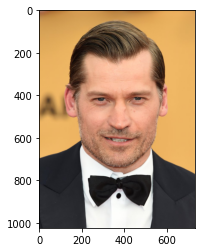

In [118]:
img = plt.imread('/content/Jamie_Before.jpg')
plt.imshow(img)

In [119]:
img.shape

(1024, 733, 3)

In [120]:
eye = eyesCascade.detectMultiScale(img)[0]
print(eye)

[218 349 317 145]


In [121]:
eye_x,eye_y,eye_w,eye_h = eye

In [122]:
nose = noseCascade.detectMultiScale(img, 1.5)[0]
print(nose)
nose_x,nose_y,nose_w,nose_h = nose

[308 476 137 114]


In [44]:
img = cv2.rectangle(img, (eye_x,eye_y), ( eye_x + eye_w , eye_y + eye_h ),(255,255,255),2)
img = cv2.rectangle(img, (nose_x,nose_y), ( nose_x + nose_w , nose_y + nose_h ),(255,255,255),2)

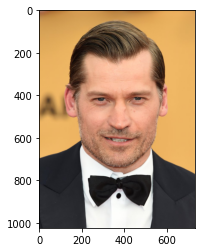

In [123]:
plt.imshow(img)

In [124]:
glasses = plt.imread('/content/glasses.png')
mustache = plt.imread('/content/mustache.png')

In [125]:
glasses.shape

(221, 483, 4)

In [126]:
glasses = cv2.resize(glasses,(eye_w,eye_h))

In [127]:
glasses.shape

(145, 317, 4)

In [128]:
img = img.copy()

In [129]:
for i in range(glasses.shape[0]):
  for j in range(glasses.shape[1]):
    if(glasses[i,j,3]>0):
      img[eye_y+i,eye_x+j, : ] = glasses[i,j,:-1]

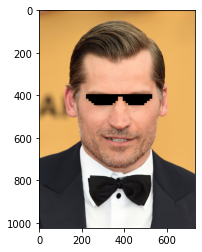

In [130]:
plt.imshow(img)

In [131]:
mustache.shape

(320, 640, 4)

In [132]:
mustache = cv2.resize(mustache, (nose_w+50,nose_h))

In [133]:
mustache.shape

(114, 187, 4)

In [134]:
for i in range(mustache.shape[0]):
  for j in range(mustache.shape[1]):
    if(mustache[i,j,3]>0):
      img[nose_y+i+50 , nose_x+j-25 , : ] = mustache[i , j , : -1 ]

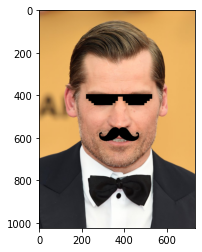

In [135]:
plt.imshow(img)